# 1. Hashing task!
For this task we're working with hashing algorithms. In particular you we are going to implement hash functions and a structure called Bloom Filter.

A Bloom filter is a data structure designed to tell you, rapidly and memory-efficiently, whether an element is present in a set.

The price paid for this efficiency is that a Bloom filter is a probabilistic data structure: it tells us that the element either definitely is not in the set or may be in the set.

### Importing libraries we need.

In [1]:
import numpy as np,pandas as pd,math,time

Opening password files and returning the DataFrame.

In [2]:
def load_df(_): 
    with open(f"DATA/passwords{_}.txt","r") as f:
        data = f.read()
        return pd.DataFrame(data.split("\n"))

### Global variables
We have set the size of bloom filter to be large, thus reducing false positives.

In [3]:
n     = 100_000_000                        #number of passwords
k     = 4                                  #number of hash_functions used.
m     = 1_500_000_000                      # size of Bloom filter
p     = pow(1 - math.exp(-k / (m / n)), k) #probability of false positive.
df    = load_df(1) #loading password 1 file.
df2   = load_df(2) #loading password 2 file.
prime = 1_500_000_001

### Defining hash table

In [4]:
hash_table = np.zeros(m,dtype=int)     #creating the Hash_table based on size of m.

Code to get next prime number after a given number.

In [5]:
def next_prime(number): 
    while True:
        number += 1
        for i in range(2,number):
            if number%i == 0:
                break
            else:
                return number

In [6]:
prime = next_prime(m)

DJB hash function
Here i have modified DJB hash function to turn strings to large numbers.
5381 is just a number that, in testing, resulted in fewer collisions and better avalanching.

In [7]:
def hash_function1(s):                                                                                                                                
    h = 5381
    for x in s:
        h = (( h << 5) + h) + ord(x)    
    return h % prime

Polynomials hashing. We can choose a nonzero constant, a != 1, and calculate (𝑥0𝑎𝑘−1+𝑥1𝑎𝑘−2+...+𝑥𝑘−2𝑎+𝑥𝑘−1)
(
x
0
a
k
−
1
+
x
1
a
k
−
2
+
.
.
.
+
x
k
−
2
a
+
x
k
−
1
)
The value of a is usually a prime number. 

In [8]:
def hash_function2(string):
    hash_value = 0
    for _ in range(len(string)-1,-1,-1):
        hash_value += (ord(string[_])*pow(19,_))
    hash_value = hash_value % prime
    return hash_value

A tweak on the previous hash function

In [9]:
def hash_function3(string):
    hash_val = 0
    for position in range(len(string)):
        hash_val = hash_val + (ord(string[position]) **position)
    return hash_val % prime

Hash function based on XOR

In [10]:
def hash_function4(string):
    hash = 0
    for char in range(len(string)):
        hash += (hash ^ ord(string[char]))*char
    return hash % prime

For number of passwords in the df
and for each row we call 4 hash_functions
technically we get 4 indices and we change
the value to 1 in the hash table.

In [11]:
def update_hash_function(): 
    for _ in range(len(df)):
        try:
            result1 = hash_function1(df[0][_])
            result2 = hash_function2(df[0][_])
            result3 = hash_function3(df[0][_])
            result4 = hash_function4(df[0][_])
            hash_table[result1] = 1
            hash_table[result2] = 1
            hash_table[result3] = 1
            hash_table[result4] = 1    
        except:
            pass

loading second file and paassing to the same hash functions.
we check the results with values in hash_table.
if they are all 1 we add 1 to the sum variable.

In [12]:
def check_function():
    sum = 0
    for _ in range(len(df2)):
        result1 = hash_table[hash_function1(df2[0][_])]
        result2 = hash_table[hash_function2(df2[0][_])]
        result3 = hash_table[hash_function3(df2[0][_])]
        result4 = hash_table[hash_function4(df2[0][_])]
        if result1 == 1 and result2 == 1 and result3 == 1 and result4 ==1:
            sum += 1
    return sum

Here we call update and check functions and print the results.

In [13]:
def BloomFilter():  
    start = time.time()  
    update_hash_function()
    n = check_function()
    end = time.time() 
    print('Number of hash function used: ', k)
    print('Number of duplicates detected: ', n)
    print('Probability of false positives: ', p)
    print('Execution time: ', end-start)

In [14]:
BloomFilter()

Number of hash function used:  4
Number of duplicates detected:  14075668
Probability of false positives:  0.0030018939981219244
Execution time:  22507.59885907173


The results taken from Mac book air which is not meant for computational tasks.

# 2. Alphabetical Sort

### 2.1 Counting Sort

Referring to the guide shared in the homework's readme ( <a href="https://www.hackerearth.com/practice/algorithms/sorting/counting-sort/tutorial/" > Counting Sort </a> ), we implemented counting_sort function.

In [15]:
def counting_sort(unsorted_list):
    #finding the max in the list         O(N)
    M = max(unsorted_list)
    
    #new empty listo f size M            O(M)
    aux_list = [0 for i in range(M)]
    
    #assign frequencies to aux_list      O(N)
    for el in unsorted_list:
        aux_list[el-1] += 1
        
    #add to the sorted list an element for each frequency of the index O(N)
    sorted_list = [index+1 for index in range(M) for s in range(aux_list[index])] 
    
    return sorted_list

Let's check what happens with a random numbers list:

In [16]:
counting_sort([4,2,9,1, 6, 5, 4, 2, 1, 2, 4, 9])

[1, 1, 2, 2, 2, 4, 4, 4, 5, 6, 9, 9]

Let's try a longer list:

In [17]:
counting_sort([4, 3, 2, 3, 5, 6, 7, 8, 4, 2, 1, 2, 3, 4, 5, 6, 7, 8, 3, 2, 3, 2, 9, 5])

[1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9]

### 2.2 Alphabetical sort

Let's define a list with all the letters of the alphabet in random order:

In [18]:
random_list = ["j","v","k","d","g","s","z","t","q","m","b","o","p","f","l","r","a","e","u","n","c","i","w","h","y","x"]

To implement the alphabetical sort we created a function to convert letters to integers, we used 0 for the spaces:

In [19]:
def charsToIntDict(chars_list, conversion_dict, unsorted_list):
    for el in chars_list:
        if el != " ":
            el_low = el.lower()
            converted_num = ord(el_low) - 96
        else:
            el_low = " "
            converted_num = 0
        unsorted_list.append(converted_num)
        conversion_dict[converted_num] = el_low
    return conversion_dict, unsorted_list

For the counting sort we added the indeces to the previous function, so the function returns the sorted list of the integers, and the list of the original indeces:

In [20]:
def countingSort_v2(unsorted_list):
    M = max(unsorted_list)
    
    aux_list = [0 for i in range(M+1)]
    inverted_index = {}
    index_list = []
    
    #O(N)
    for i in range(len(unsorted_list)):
        aux_list[unsorted_list[i]] += 1
        if unsorted_list[i] not in inverted_index:
            inverted_index[unsorted_list[i]] = [i]
        else:
            inverted_index[unsorted_list[i]].append(i)
            
    #frequencies * M = N -> O(N)
    sorted_list = [index for index in range(M+1) for s in range(aux_list[index])]

    #O(N)
    for el in sorted_list:
        if len(inverted_index[el]) > 0:
            index_list.append(inverted_index[el][0])
            del inverted_index[el][0]
        else:
            index_list.append(0)
    
    return sorted_list, index_list  

alphabeticalSort function receives a list of letters, calls charsToIntDict to convert the letters to integers and then calls countingSort_v2 to sort the integers. Then it converts the integers to the orgininal letters, and returns the list of the sorted letters and the original indeces.

In [21]:
def alphabeticalSort(random_list):
    conversion_dict = {}
    unsorted_list = []
    conversion_dict, unsorted_list = charsToIntDict(random_list, conversion_dict, unsorted_list) # O(N)
    sorted_list, index_list = countingSort_v2(unsorted_list) # O(3N) 
    chars_sorted_list = [conversion_dict[el] for el in sorted_list] # O(N)
    return chars_sorted_list, index_list

In [23]:
print(alphabeticalSort(random_list)[0])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


#### Time complexity

The counting sort is usually used to sort numbers. In fact the time complexity of the first implementation of the counting sort is: 

    O(2N+M)
    where N is the number of letters and M the max value of the indeces, this algo is especially used when N >> M

The implementation to sort letters is a little bit different. Let's check the time complexity:


    alphabeticalSort:
        charsToIntDict -> O(N)
        + countingSort_v2 -> O(3N)
        + O(N)
    -> O(5N),
    
    where N is the number of letters, in this case the alphabetical letters, so N = 26


### 2.3 Words Sort


wrodssortbyletters function sort a words list by the indeces returned from alphabeticalSort function:


In [24]:
def wordsortbyletters(chars_dict, words_dict):
    chars_sorted ,index_sorted = alphabeticalSort(chars_dict)
    words_sorted = []
    for el in index_sorted:
        words_sorted.append(words_dict[el])
    return words_sorted

sortWords is the function that receives a list of words and the max lenght of the words. It returns the sorted list of the words:

In [25]:
def sortWords(random_words_list, n = 50):
    if len(random_words_list) < 2:
        return random_words_list
    else:
        list_index = [i for i in range(len(random_words_list))]
        sorted_list_words = []
        previous_letter = ''
        tmp_dict_c = []
        tmp_dict_w = []
        for j in range(n-1,-1,-1):
            tmp_dict_c = []
            tmp_dict_w = []
            for i in range(len(random_words_list)):
                if len(random_words_list[i]) > j:
                    tmp_dict_c.append(random_words_list[i][j])
                    tmp_dict_w.append(random_words_list[i])
                else:
                    tmp_dict_c.append(" ")
                    tmp_dict_w.append(random_words_list[i])
            random_words_list = wordsortbyletters(tmp_dict_c, tmp_dict_w)
        return random_words_list

In [26]:
random_words_list = ["hello", "man", "how", "what", "alpha", "letters", "sorting", 
                     "alphabetical", "alpha sort", "alph", "and", "absolutely", "i dont know", "time", "complexity"]

In [27]:
max_length_of_words = int(input())

12


In [28]:
sortWords(random_words_list, max_length_of_words)

['absolutely',
 'alph',
 'alpha',
 'alpha sort',
 'alphabetical',
 'and',
 'complexity',
 'hello',
 'how',
 'i dont know',
 'letters',
 'man',
 'sorting',
 'time',
 'what']

#### Time complexity

Let's see the time complexity of the sortWords function:

    The algo starts from the end of the words and sort all the letters in the same position. So it calls alphabeticalSort functions n times, where n is the max lenght of the string. 
    So the time complexity of the sortWords function is:
    
    n -> where n is the max lenght of the words
    * 
    (N + wordssortnbyletters)  -> where N is the lenght of the list of words and wordsortbyletters functions is N + alphabeticalSort
    
    
    so it is n*(2N + 5N) ->  O(n*7N)
    
    Obviously this is the worst case. 

If n << N we can say that the sortWords function is in general:
    O(N)

# 3.  Find similar wines!

In [7]:
import numpy as np                                
import pandas as pd                               
import seaborn as sns                             
import matplotlib.pyplot as plt                   
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

## Import dataset as pandas dataframe

In [8]:
#We define columns' names as written in the wine.names file
wine_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315',\
              'Proline']
#We create a dataframe from the wine.data file
df = pd.read_csv('DATA/wine.data',names=wine_names)

In [9]:
#We observe that there are three classes of observation so we set k=3
#We don't need the first column because we are doing clustering,that is an unsupervised learning and it works with unlabeled data
df.drop(['Class'], axis=1,inplace=True)

### Standardization of the dataset

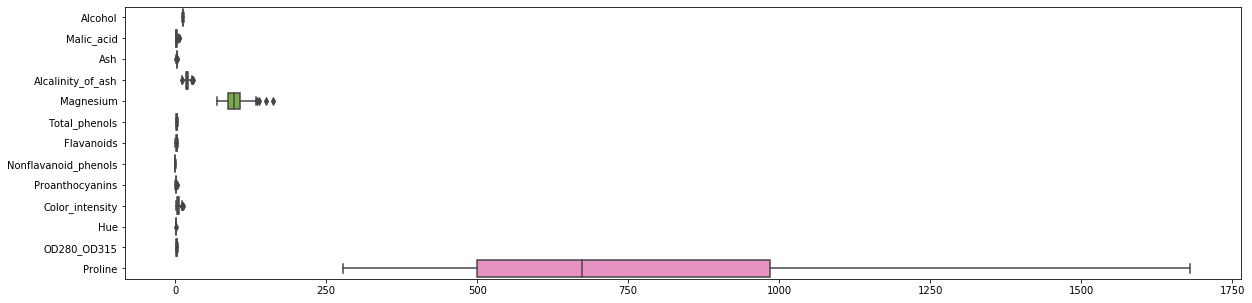

In [10]:
#Let's plot the distribution of the 13 variables that we have
plt.figure(figsize = (20,5))
sns.boxplot(data = df, orient = "h")
plt.show()

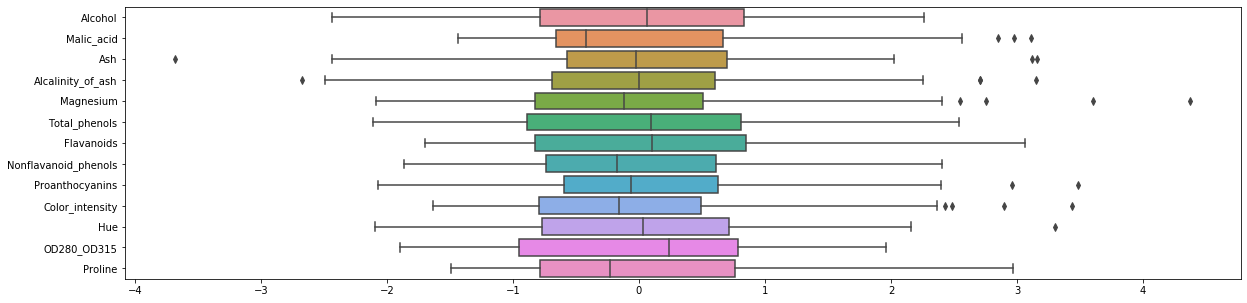

In [11]:
#We can see that the variable 'Proline' has a different order of magnitude compared to the other variables.
#So we need to preprocessing the dataset or we can't compare these variable and we can't use the k-means clustering method
#We will standardize the dataset using the StandardScaler from the scikitlearn library
scaler = StandardScaler()
#We create the scaler function and we pass it to our dataframe
#It returns an array that we transform into a pandas dataframe because it's easier to manage
final_df=pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
#We plot the distribution of the variables of the dataframe and we see if something has changed
plt.figure(figsize = (20,5))
sns.boxplot(data = final_df, orient = "h")
plt.show()
#Now that the variables are standardized we can work on it

### K-means from the scratch

In [12]:
#Let's write from the scratch our implementation of the k-means method
#But first we convert our pandas dataframe to a Numpy array because it's easier to work with
np_data_set = final_df.to_numpy(copy=True)

In [13]:
#We define the functions that we will use to do the Kmeans clustering
#This function randomly finds k starting centroids
def initialise_random_centroids(data,k):
        centroids=data[np.random.choice(data.shape[0], k, replace=False)]
        return centroids

In [14]:
#This function calculates clusters based on random centroids using a function from scikit learn library
def calculate_clusters(data,centroids):
    distances_to_centroids=euclidean_distances(data,centroids)
    clusters=np.argmin(distances_to_centroids,axis = 1) 
    return clusters

In [15]:
#This function updates centroids following the kMeans method
def update_centroids(data,centroids,clusters,k):
        for i in range(k):
            centroids[i] = np.array([data[clusters == i].mean(axis = 0)])
        return centroids

In [16]:
#This function contains the main loop that is used to do the clustering
def Kmeans_loop(data,k):
    centroids=initialise_random_centroids(data,k)
    itr = 0
    max_itr=200
    while True:
        oldCentroids=centroids.copy()
        clusters = calculate_clusters(data,centroids)
        new_centroids=update_centroids(data,centroids,clusters,k)
        itr += 1
        if (new_centroids == oldCentroids).all() or itr >= max_itr:
            break    
    return clusters,centroids

In [17]:
#Now we can do the clustering
#We start by choosing k = 3 because the wine's classes are exactly 3
clusters,centroids = Kmeans_loop(np_data_set,3)

In [18]:
#We obtaines three centroids
centroids

array([[ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559]])

In [19]:
#And an array that for each element identifies the right cluster
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Improving our K-means implementation

In [20]:
#We want to repeat our Kmeans and choose only the result with the minimum dissimilarities between elements of the Cluster and each centroids
#We reshape our clusters array so we can append to our numpy array
#We define a function that computes the dissimilarity of the set of clusters
#so we compute and we see how much the examples within clusters are different from each other
#We define a function called dissimilarity that it's useful for our purpose
def dissimilarity(data,clusters,centroids,k):
    clusters_to_append=clusters.reshape(178,1)
    data_with_clusters=np.append(data,clusters_to_append,axis=1)
    totDist=0
    for i in range(k): 
        array_only_cluster = data_with_clusters[data_with_clusters[:, 13] == i]
        array_only_cluster = np.delete(array_only_cluster, 13, 1)#delete clusters
        single_centroid=centroids[i]
        single_centroid=single_centroid.reshape(1,13)
        tot_dist_cluster=(euclidean_distances(array_only_cluster,single_centroid))**2
        totDist+=np.sum(tot_dist_cluster)
    return totDist

In [21]:
#Now we define a function that runs the kmeans function n times and we return the best_clusters and the best_centroids
#Using our dissimilarity function that we have just written
def trykmeans(data, k, trials_number):
    best_clusters,best_centroids = Kmeans_loop(data,k)
    minimum_Dissimilarity = dissimilarity(data,best_clusters,best_centroids,k)
    trials = 1
    while trials < trials_number:
        clusters,centroids = Kmeans_loop(data,k)
        current_Dissimilarity = dissimilarity(data,clusters,centroids,k)
        if current_Dissimilarity < minimum_Dissimilarity:
            minimum_Dissimilarity = current_Dissimilarity
            best_clusters=clusters
            best_centroids=centroids
        trials += 1    
    return best_clusters,best_centroids

In [22]:
best_clusters,best_centroids=trykmeans(np_data_set,3,4000)

### Elbow method

[2314.0, 1659.0079672511504, 1282.4635183465311, 1211.9323771582262, 1129.7511624219537, 1048.9666099081505, 1024.5598775258986, 954.1452562229207, 963.6295116819108, 908.4045489552169]


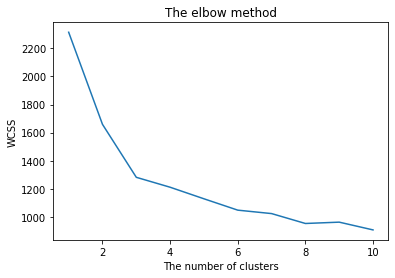

In [23]:
#We choosed k=3 because the classes were 3.
#But is the k=3 the optimal value?
#Let's find out using the elbow method!
#We compute the wcss using the dissimilarity function and we plot the function that we obtain
wcss = []
for i in range(1,11):
    clusters,centroids = Kmeans_loop(np_data_set,i)
    
    wcss.append(dissimilarity(np_data_set,clusters,centroids,i))
print(wcss)
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()
#We see that the optimal value is 3!

### Mean values of the features of the three clusters


In [24]:
#Now we wanna obtain a dataframe in which we can see the mean values of each column of the three clusters
#Now let's see if there clusters are similar
#We compute the mean of each feature of the cluster    
df['Cluster']= best_clusters#We append the clusters to the first dataframe
final_df['Cluster']=best_clusters
empty_dataframe=pd.DataFrame(columns=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315',\
              'Proline'])
k=3
for i in range(3):
    array_only_cluster=df[final_df.Cluster == i]
    del array_only_cluster['Cluster']
    array_only_cluster=array_only_cluster.mean(axis = 0)
    array_only_cluster=array_only_cluster.to_frame()
    array_only_cluster=array_only_cluster.transpose()
    empty_dataframe=empty_dataframe.append(array_only_cluster)
mean_dataframe=empty_dataframe 
mean_dataframe['Cluster']=[0,1,2]
mean_dataframe

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline,Cluster
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,1
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,2


### Seaborn pairplot!

/Users/antonio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/antonio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


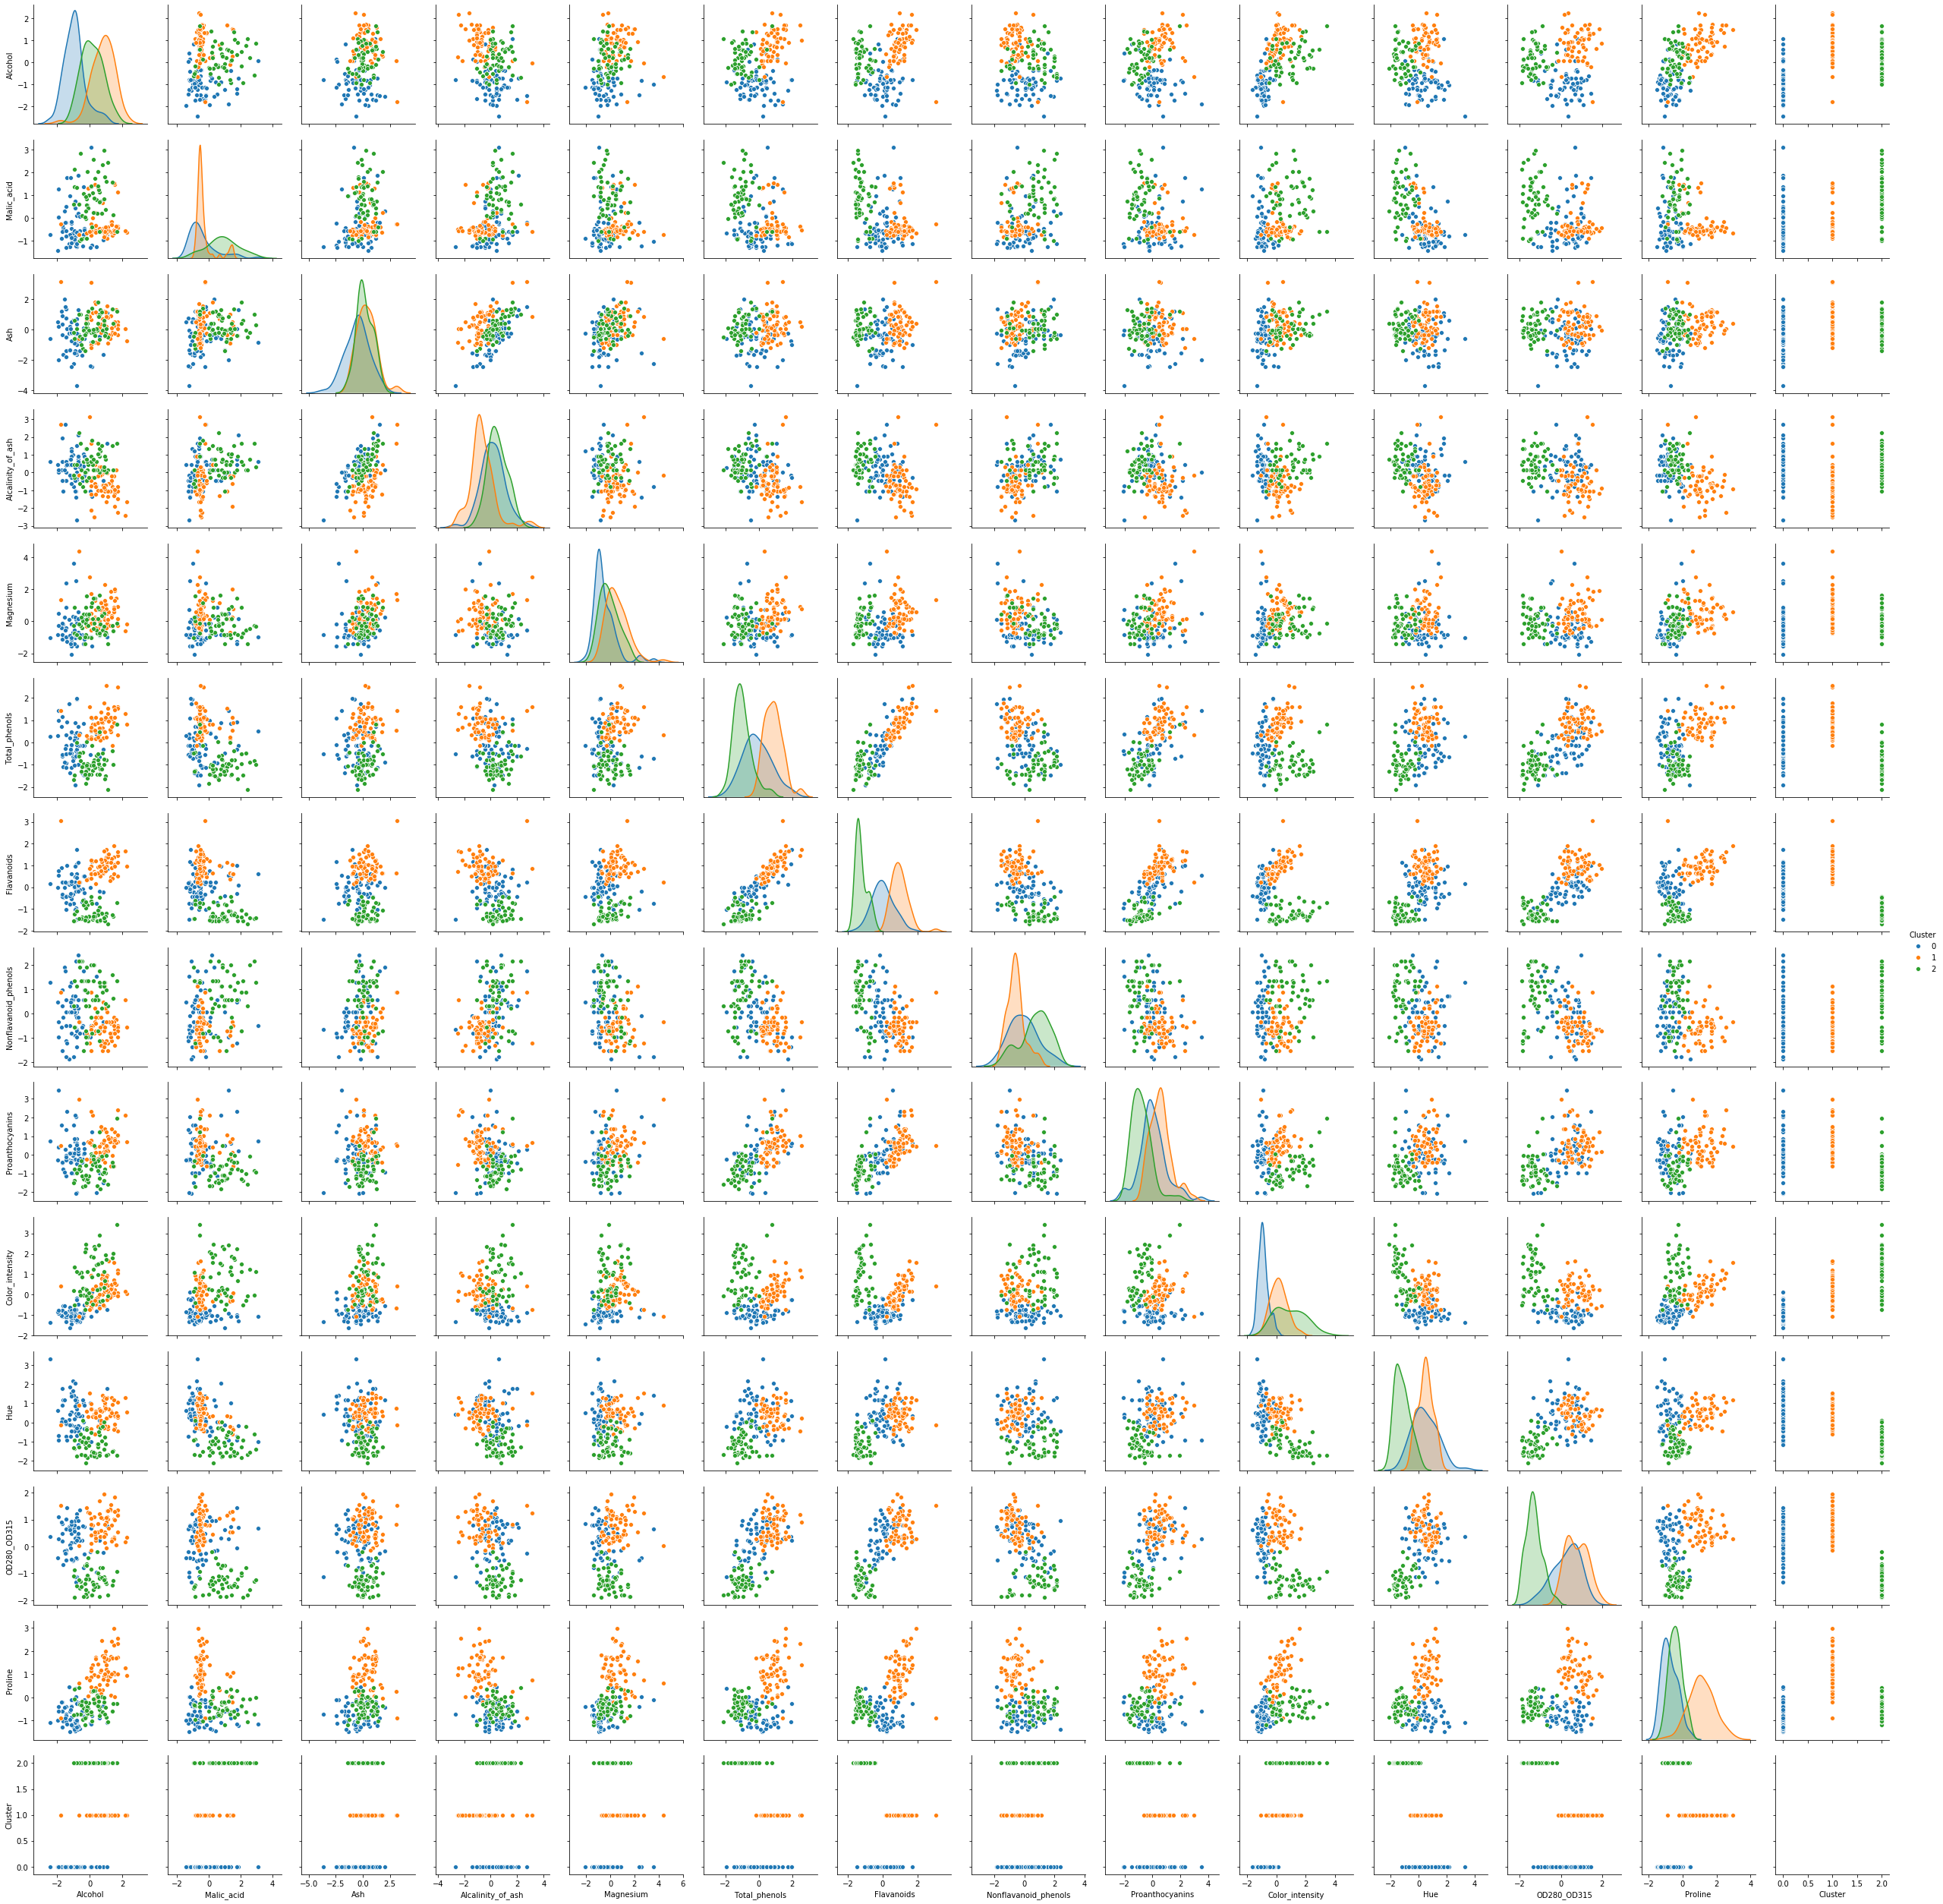

In [25]:
#We see that the main differences are in the flavonoids values,color intensity,OD280/OD315,Proline,Total phenols, Hue and Malic acid
#Let's do some plotting!
#Let's plot a pairplot using the seaborn library
#You can double-click to zoom in!
sns.pairplot(final_df,hue = 'Cluster')

### Distributions of the features for each class using kernel density estimators.

#### Alcohol

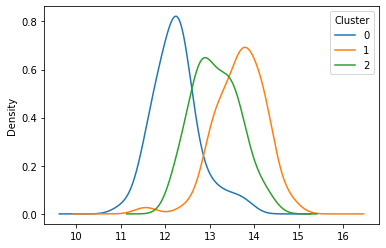

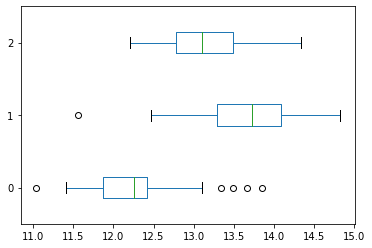

In [26]:
df.pivot(columns='Cluster').Alcohol.plot(kind = 'kde')
df.pivot(columns='Cluster').Alcohol.plot.box(vert=False)

#### Malic acid

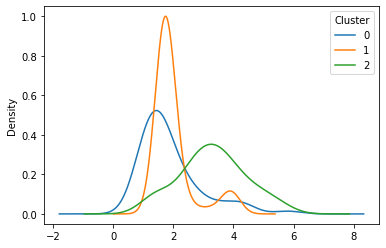

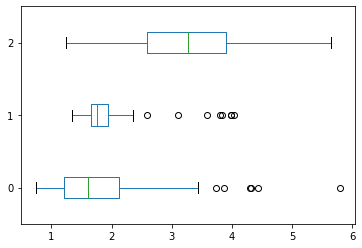

In [27]:
df.pivot(columns='Cluster').Malic_acid.plot(kind = 'kde')
df.pivot(columns='Cluster').Malic_acid.plot.box(vert=False)

#### Ash

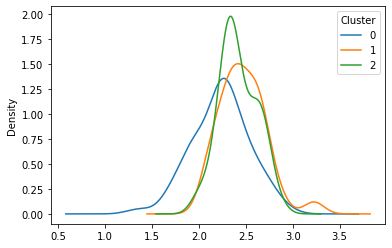

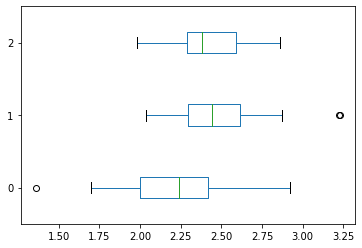

In [28]:
df.pivot(columns='Cluster').Ash.plot(kind = 'kde')
df.pivot(columns='Cluster').Ash.plot.box(vert=False)

#### Alcalinity of ash

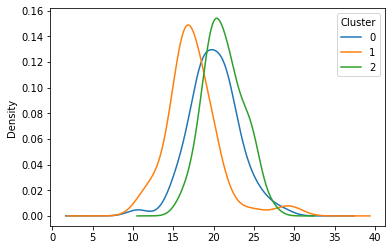

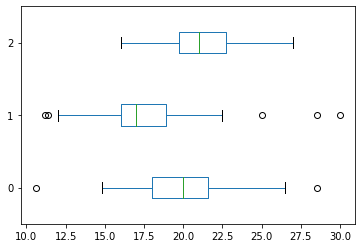

In [29]:
df.pivot(columns='Cluster').Alcalinity_of_ash.plot(kind = 'kde')
df.pivot(columns='Cluster').Alcalinity_of_ash.plot.box(vert=False)

#### Magnesium

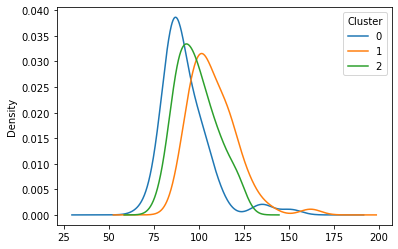

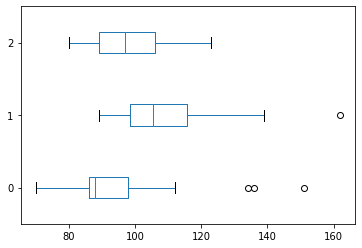

In [30]:
df.pivot(columns='Cluster').Magnesium.plot(kind = 'kde')
df.pivot(columns='Cluster').Magnesium.plot.box(vert=False)

#### Total phenols

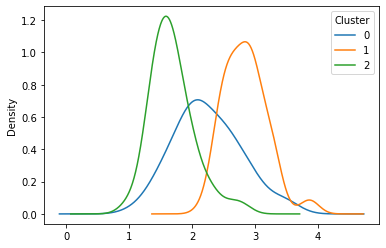

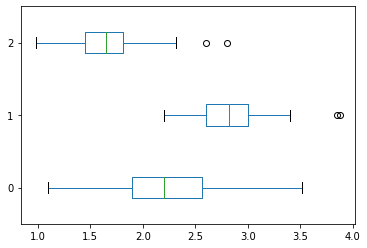

In [31]:
df.pivot(columns='Cluster').Total_phenols.plot(kind = 'kde')
df.pivot(columns='Cluster').Total_phenols.plot.box(vert=False)

#### Flavanoids

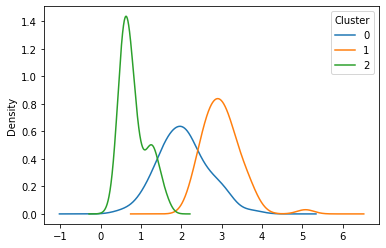

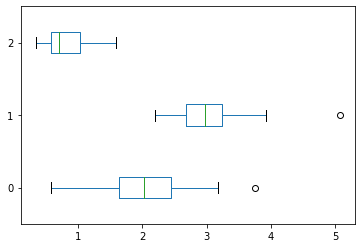

In [32]:
df.pivot(columns='Cluster').Flavanoids.plot(kind = 'kde')
df.pivot(columns='Cluster').Flavanoids.plot.box(vert=False)

#### Non-flavanoid phenols

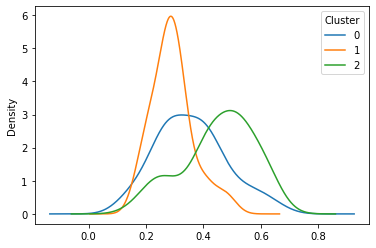

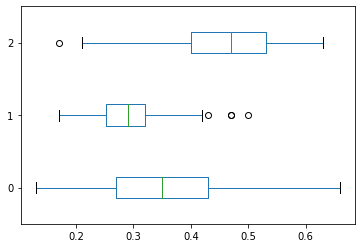

In [33]:
df.pivot(columns='Cluster').Nonflavanoid_phenols.plot(kind = 'kde')
df.pivot(columns='Cluster').Nonflavanoid_phenols.plot.box(vert=False)

#### Proanthocyanins

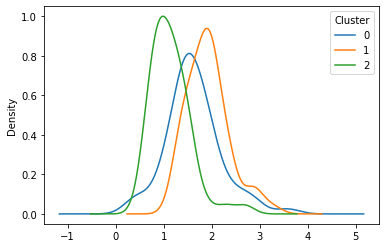

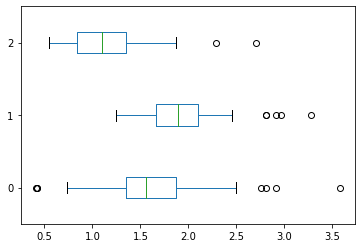

In [34]:
df.pivot(columns='Cluster').Proanthocyanins.plot(kind = 'kde')
df.pivot(columns='Cluster').Proanthocyanins.plot.box(vert=False)

#### Color intensity

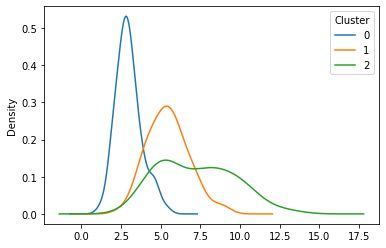

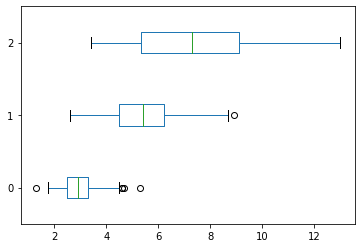

In [35]:
df.pivot(columns='Cluster').Color_intensity.plot(kind = 'kde')
df.pivot(columns='Cluster').Color_intensity.plot.box(vert=False)

#### Hue

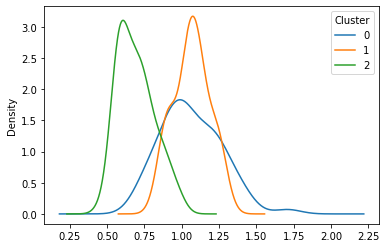

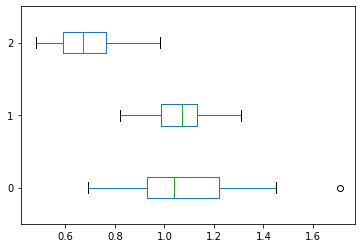

In [36]:
df.pivot(columns='Cluster').Hue.plot(kind = 'kde')
df.pivot(columns='Cluster').Hue.plot.box(vert=False)

#### OD280/OD315

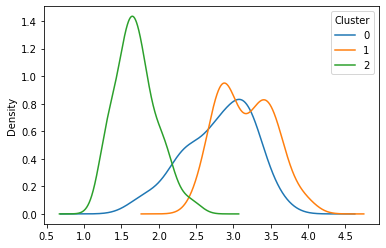

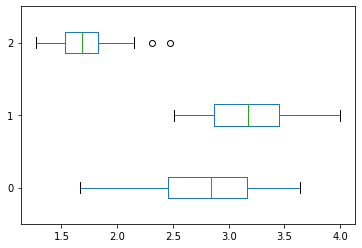

In [37]:
df.pivot(columns='Cluster').OD280_OD315.plot(kind = 'kde')
df.pivot(columns='Cluster').OD280_OD315.plot.box(vert=False)

#### Proline

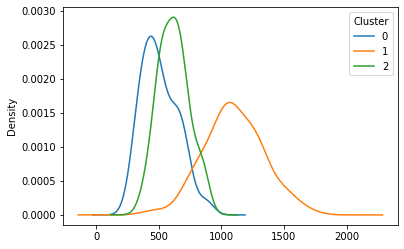

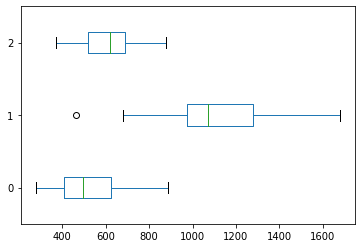

In [38]:
df.pivot(columns='Cluster').Proline.plot(kind = 'kde')
df.pivot(columns='Cluster').Proline.plot.box(vert=False)

    We see that there are some features that are very different in each cluster. In particular:

    Cluster 0 : the main features of this cluster are alcohol and color intensity.

    Cluster 1 : the main features of this cluster are alcohol,proline,color intensity,total phenols and flavanoids.

    Cluster 2 : the main features of this cluster are malic acid,total phenols,flavanoids,OD280/OD315,color intensity and Hue.

# 4. K-means can go wrong!

In [39]:
import matplotlib.pylab as plt            
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans

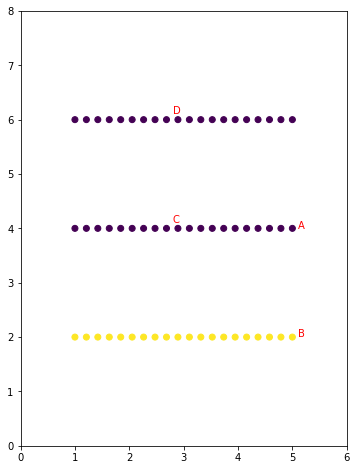

In [40]:
X = np.tile(np.linspace(1, 5, 20), 3)
y = np.repeat(np.array([2, 4,6]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X, y, c=labels)
plt.xlim([0, 6])
plt.ylim([0, 8])
plt.text(5.1, 4, 'A', color='red')
plt.text(5.1, 2, 'B', color='red')
plt.text(2.8, 4.1, 'C', color='red')
plt.text(2.8, 6.1, 'D', color='red')
ax.set_aspect('equal')

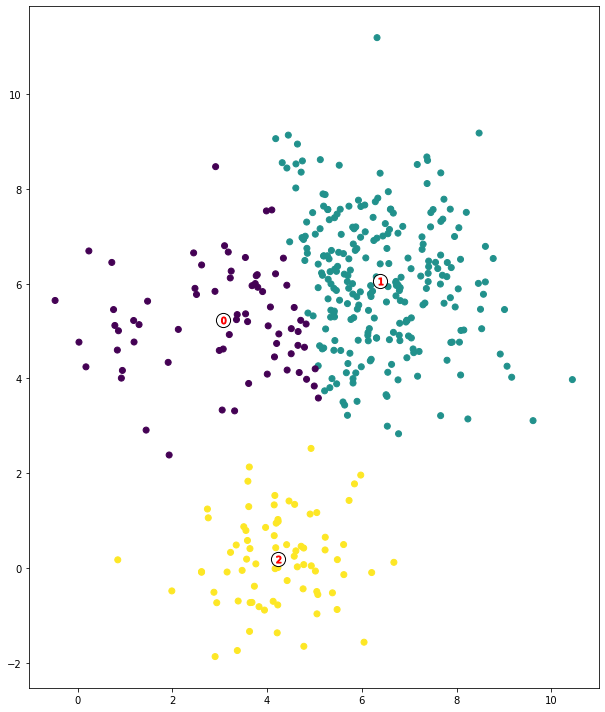

In [41]:
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=300)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

# Run kmeans
km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(df[:, 0], df[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax.set_aspect('equal')
plt.tight_layout()

In [42]:
#We use the k-means function from the third exercise
#We define a new function that searches for the centroids that

def trykmeans2(data, k, trials_number):
    worst_clusters,worst_centroids = Kmeans_loop(data,k)
    maximum_Dissimilarity = dissimilarity(data,best_clusters,best_centroids,k)
    trials = 1
    while trials < trials_number:
        clusters,centroids = Kmeans_loop(data,k)
        current_Dissimilarity = dissimilarity(data,clusters,centroids,k)
        if current_Dissimilarity > maximum_Dissimilarity:
            maximum_Dissimilarity = current_Dissimilarity
            worst_clusters=clusters
            worst_centroids=centroids
        trials += 1    
    return worst_clusters,worst_centroids

In [43]:
#We calculate the cost of the optimization for the centroids that we have found
worst_clusters,worst_centroids=trykmeans2(np_data_set,3,4000)
dissimilarity(np_data_set,worst_clusters,worst_centroids,3)

1889.3795434296385

In [44]:
#Let's see if there are some differences between this cost and the other trykmeans function
best_clusters,best_centroids=trykmeans(np_data_set,3,4000)
dissimilarity(np_data_set,best_clusters,best_centroids,3)

1277.928488844642